In [7]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [8]:
df=pd.read_csv('inv_verii.txt')

In [9]:
df=df.drop(['device_id'],axis=1)

In [10]:
df['time']

0         2021-04-25 02:55:00
1         2021-04-25 03:00:00
2         2021-04-25 03:05:00
3         2021-04-25 03:10:00
4         2021-04-25 03:15:00
                 ...         
122742    2022-06-25 07:25:00
122743    2022-06-25 07:30:00
122744    2022-06-25 07:35:00
122745    2022-06-25 07:40:00
122746    2022-06-25 07:45:00
Name: time, Length: 122747, dtype: object

In [11]:
df['time']=pd.to_datetime(df['time'])

In [12]:
from datetime import datetime, timedelta
df['time'][0] + timedelta(hours=3)

Timestamp('2021-04-25 05:55:00')

In [13]:
from datetime import datetime, timedelta
for i in range(len(df)):
    df['time'][i]=df['time'][i]+timedelta(hours=3)

C:\Users\zetze\AppData\Local\Temp/ipykernel_9568/3349892121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'][i]=df['time'][i]+timedelta(hours=3)


In [14]:
df.time

0        2021-04-25 05:55:00
1        2021-04-25 06:00:00
2        2021-04-25 06:05:00
3        2021-04-25 06:10:00
4        2021-04-25 06:15:00
                 ...        
122742   2022-06-25 10:25:00
122743   2022-06-25 10:30:00
122744   2022-06-25 10:35:00
122745   2022-06-25 10:40:00
122746   2022-06-25 10:45:00
Name: time, Length: 122747, dtype: datetime64[ns]

In [9]:
weat=pd.read_csv('wet.txt',sep='\t')

In [10]:
weat

time  ambient_temp  module_temp  pyranometer  \
0       2021-04-25 00:00:00      8.840652     12.37858          0.0   
1       2021-04-25 00:05:00      8.840652     12.37858          0.0   
2       2021-04-25 00:10:00      8.840652     12.37858          0.0   
3       2021-04-25 00:15:00      8.937763     12.42305          0.0   
4       2021-04-25 00:20:00      8.937763     12.42305          0.0   
...                     ...           ...          ...          ...   
122971  2022-06-25 23:35:00     13.351280     15.89947          0.0   
122972  2022-06-25 23:40:00     13.351280     15.89947          0.0   
122973  2022-06-25 23:45:00     13.655410     16.27539          0.0   
122974  2022-06-25 23:50:00     13.655410     16.27539          0.0   
122975  2022-06-25 23:55:00     13.655410     16.27539          0.0   

        wind_speed  
0         2.051177  
1         2.051177  
2         2.051177  
3         1.883760  
4         1.883760  
...            ...  
122971    2.510611  
122972    2.510611  
122973    2.492161  
122974    2.492161  
122975    2.492161  

[122976 rows x 5 columns]

In [11]:
weat['time']=pd.to_datetime(weat['time'])

In [12]:
for i in range(len(weat)):
    weat['time'][i]=weat['time'][i]+timedelta(hours=3)

C:\Users\zetze\AppData\Local\Temp/ipykernel_10000/1286622390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weat['time'][i]=weat['time'][i]+timedelta(hours=3)


In [13]:
weat.time

0        2021-04-25 03:00:00
1        2021-04-25 03:05:00
2        2021-04-25 03:10:00
3        2021-04-25 03:15:00
4        2021-04-25 03:20:00
                 ...        
122971   2022-06-26 02:35:00
122972   2022-06-26 02:40:00
122973   2022-06-26 02:45:00
122974   2022-06-26 02:50:00
122975   2022-06-26 02:55:00
Name: time, Length: 122976, dtype: datetime64[ns]

In [14]:
weat

time  ambient_temp  module_temp  pyranometer  wind_speed
0      2021-04-25 03:00:00      8.840652     12.37858          0.0    2.051177
1      2021-04-25 03:05:00      8.840652     12.37858          0.0    2.051177
2      2021-04-25 03:10:00      8.840652     12.37858          0.0    2.051177
3      2021-04-25 03:15:00      8.937763     12.42305          0.0    1.883760
4      2021-04-25 03:20:00      8.937763     12.42305          0.0    1.883760
...                    ...           ...          ...          ...         ...
122971 2022-06-26 02:35:00     13.351280     15.89947          0.0    2.510611
122972 2022-06-26 02:40:00     13.351280     15.89947          0.0    2.510611
122973 2022-06-26 02:45:00     13.655410     16.27539          0.0    2.492161
122974 2022-06-26 02:50:00     13.655410     16.27539          0.0    2.492161
122975 2022-06-26 02:55:00     13.655410     16.27539          0.0    2.492161

[122976 rows x 5 columns]

In [15]:
mix_df=pd.merge(left = weat, right = df, how = 'inner',on='time')

In [16]:
mix_df

time  ambient_temp  module_temp  pyranometer  \
0      2021-04-25 05:55:00      8.863432     12.63432       0.0000   
1      2021-04-25 06:00:00      8.801974     12.98212       0.0000   
2      2021-04-25 06:05:00      8.801974     12.98212       0.0000   
3      2021-04-25 06:10:00      8.801974     12.98212       0.0000   
4      2021-04-25 06:15:00      8.860266     13.38708       0.0000   
...                    ...           ...          ...          ...   
122742 2022-06-25 10:25:00     19.969190     34.07469     722.6667   
122743 2022-06-25 10:30:00     20.896010     37.25966     847.3967   
122744 2022-06-25 10:35:00     20.896010     37.25966     847.3967   
122745 2022-06-25 10:40:00     20.896010     37.25966     847.3967   
122746 2022-06-25 10:45:00     21.251430     38.54860     894.2067   

        wind_speed   upv1   upv2   upv3   upv4   upv5  ...  temp    cos  \
0         2.418816  549.2  549.2  554.5  554.5  512.9  ...   9.8  0.999   
1         3.206416  549.2  549.2  554.5  554.5  512.9  ...   9.8  0.999   
2         3.206416  549.2  549.2  554.5  554.5  512.9  ...   9.8  0.999   
3         3.206416  615.2  615.2  608.1  608.1  608.4  ...  13.5  0.999   
4         3.421957  615.2  615.2  608.1  608.1  608.4  ...  13.5  0.999   
...            ...    ...    ...    ...    ...    ...  ...   ...    ...   
122742    3.811006  652.0  652.0  652.1  652.1  653.9  ...  45.8  1.000   
122743    3.810760  646.9  646.9  647.6  647.6  659.0  ...  48.5  1.000   
122744    3.810760  700.1  700.1  698.1  698.1  699.7  ...  49.8  1.000   
122745    3.810760  677.7  677.7  674.1  674.1  677.5  ...  52.2  1.000   
122746    4.239693  644.7  644.7  635.3  635.3  638.8  ...  47.6  1.000   

          fac     pac  qac    eac  dc_power  e_day    e_total  ac_dc_rate  
0       49.98   0.098  0.0  0.003     0.126   0.00  200963.54      75.900  
1       49.98   0.098  0.0  0.003     0.126   0.01  200963.55      75.900  
2       49.98   0.098  0.0  0.003     0.126   0.01  200963.55      75.900  
3       49.99   0.516  0.0  0.033     0.573   0.04  200963.58      89.640  
4       49.99   0.516  0.0  0.033     0.573   0.08  200963.62      89.640  
...       ...     ...  ...    ...       ...    ...        ...         ...  
122742  50.02  37.913  0.0  3.070    38.529  54.34  292001.95      98.401  
122743  50.03  14.948  0.0  2.890    14.948  57.23  292004.83      99.997  
122744  49.99  39.603  0.0  2.650    40.331  59.88  292007.48      98.195  
122745  50.01  39.601  0.0  3.020    40.390  62.90  292010.50      98.047  
122746  49.96  11.115  0.0    NaN       NaN  65.17  292012.77         NaN  

[122747 rows x 39 columns]

In [17]:
len(mix_df)

122747

In [18]:
len(df)

122747

In [19]:
mix_df[50698:50798]

time  ambient_temp  module_temp  pyranometer  wind_speed  \
50698 2021-10-18 06:45:00         7.776       10.986          0.0       2.056   
50699 2021-10-18 06:50:00         7.776       10.986          0.0       2.056   
50700 2021-10-18 06:55:00         7.776       10.986          0.0       2.056   
50701 2021-10-18 07:00:00         7.781       10.754          0.0       1.968   
50702 2021-10-18 07:05:00         7.781       10.754          0.0       1.968   
...                   ...           ...          ...          ...         ...   
50793 2021-10-18 14:40:00        14.026       20.723        236.0       2.860   
50794 2021-10-18 14:45:00        14.265       21.836        187.0       2.907   
50795 2021-10-18 14:50:00        14.265       21.836        187.0       2.907   
50796 2021-10-18 14:55:00        14.265       21.836        187.0       2.907   
50797 2021-10-18 15:00:00        13.838       20.962        195.0       3.018   

        upv1   upv2   upv3   upv4   upv5  ...  temp  cos    fac     pac  qac  \
50698    0.0    0.0    0.0    0.0    0.0  ...   0.0  0.0   0.00   0.000  0.0   
50699    0.0    0.0    0.0    0.0    0.0  ...   0.0  0.0   0.00   0.000  0.0   
50700  550.8  550.8  550.0  550.0  550.8  ...   6.9  0.0   0.00   0.000  0.0   
50701  633.3  633.3  632.5  632.5  633.3  ...   6.9  0.0   0.00   0.000  0.0   
50702  665.1  665.1  661.1  661.1  664.5  ...   7.1  0.0  50.02   0.000  0.0   
...      ...    ...    ...    ...    ...  ...   ...  ...    ...     ...  ...   
50793  686.5  686.5  681.9  681.9  681.9  ...  28.5  1.0  49.98   9.086  0.0   
50794  686.5  686.5  681.9  681.9  681.8  ...  28.3  1.0  50.03   9.011  0.0   
50795  693.4  693.4  706.2  706.2  706.1  ...  28.3  1.0  50.01  17.091  0.0   
50796  674.9  674.9  670.0  670.0  670.0  ...  28.5  1.0  50.01   6.490  0.0   
50797  680.5  680.5  682.2  682.2  675.8  ...  27.7  1.0  50.03   6.210  0.0   

        eac  dc_power  e_day    e_total  ac_dc_rate  
50698  0.00     0.000   0.00       0.00       0.000  
50699  0.00     0.000   0.00       0.00       0.000  
50700  0.00       NaN   0.00  247952.31         NaN  
50701  0.00       NaN   0.00  247952.31         NaN  
50702  0.00       NaN   0.00  247952.31         NaN  
...     ...       ...    ...        ...         ...  
50793  0.71     9.086  90.49  248042.80      99.998  
50794  0.81     9.275  91.30  248043.61      97.154  
50795  0.78    17.311  92.08  248044.39      98.729  
50796  0.86     6.647  92.94  248045.25      97.638  
50797  0.53     6.567  93.47  248045.78      94.564  

[100 rows x 39 columns]

In [20]:
df=mix_df

In [21]:
df

time  ambient_temp  module_temp  pyranometer  \
0      2021-04-25 05:55:00      8.863432     12.63432       0.0000   
1      2021-04-25 06:00:00      8.801974     12.98212       0.0000   
2      2021-04-25 06:05:00      8.801974     12.98212       0.0000   
3      2021-04-25 06:10:00      8.801974     12.98212       0.0000   
4      2021-04-25 06:15:00      8.860266     13.38708       0.0000   
...                    ...           ...          ...          ...   
122742 2022-06-25 10:25:00     19.969190     34.07469     722.6667   
122743 2022-06-25 10:30:00     20.896010     37.25966     847.3967   
122744 2022-06-25 10:35:00     20.896010     37.25966     847.3967   
122745 2022-06-25 10:40:00     20.896010     37.25966     847.3967   
122746 2022-06-25 10:45:00     21.251430     38.54860     894.2067   

        wind_speed   upv1   upv2   upv3   upv4   upv5  ...  temp    cos  \
0         2.418816  549.2  549.2  554.5  554.5  512.9  ...   9.8  0.999   
1         3.206416  549.2  549.2  554.5  554.5  512.9  ...   9.8  0.999   
2         3.206416  549.2  549.2  554.5  554.5  512.9  ...   9.8  0.999   
3         3.206416  615.2  615.2  608.1  608.1  608.4  ...  13.5  0.999   
4         3.421957  615.2  615.2  608.1  608.1  608.4  ...  13.5  0.999   
...            ...    ...    ...    ...    ...    ...  ...   ...    ...   
122742    3.811006  652.0  652.0  652.1  652.1  653.9  ...  45.8  1.000   
122743    3.810760  646.9  646.9  647.6  647.6  659.0  ...  48.5  1.000   
122744    3.810760  700.1  700.1  698.1  698.1  699.7  ...  49.8  1.000   
122745    3.810760  677.7  677.7  674.1  674.1  677.5  ...  52.2  1.000   
122746    4.239693  644.7  644.7  635.3  635.3  638.8  ...  47.6  1.000   

          fac     pac  qac    eac  dc_power  e_day    e_total  ac_dc_rate  
0       49.98   0.098  0.0  0.003     0.126   0.00  200963.54      75.900  
1       49.98   0.098  0.0  0.003     0.126   0.01  200963.55      75.900  
2       49.98   0.098  0.0  0.003     0.126   0.01  200963.55      75.900  
3       49.99   0.516  0.0  0.033     0.573   0.04  200963.58      89.640  
4       49.99   0.516  0.0  0.033     0.573   0.08  200963.62      89.640  
...       ...     ...  ...    ...       ...    ...        ...         ...  
122742  50.02  37.913  0.0  3.070    38.529  54.34  292001.95      98.401  
122743  50.03  14.948  0.0  2.890    14.948  57.23  292004.83      99.997  
122744  49.99  39.603  0.0  2.650    40.331  59.88  292007.48      98.195  
122745  50.01  39.601  0.0  3.020    40.390  62.90  292010.50      98.047  
122746  49.96  11.115  0.0    NaN       NaN  65.17  292012.77         NaN  

[122747 rows x 39 columns]

In [22]:
print ("\nMissing values :  ", df.isnull().any())


Missing values :   time            False
ambient_temp    False
module_temp     False
pyranometer      True
wind_speed      False
upv1            False
upv2            False
upv3            False
upv4            False
upv5            False
upv6            False
upv7            False
upv8            False
ipv1            False
ipv2            False
ipv3            False
ipv4            False
ipv5            False
ipv6            False
ipv7            False
ipv8            False
uac1            False
uac2            False
uac3            False
iac1            False
iac2            False
iac3            False
status           True
error            True
temp            False
cos             False
fac             False
pac             False
qac             False
eac              True
dc_power         True
e_day           False
e_total         False
ac_dc_rate       True
dtype: bool


In [23]:
df.pyranometer.mean()

234.2533379810292

In [25]:
for i in range (len(df)):
    if pd.isnull(df['status'][i])==True:
        df['status'][i]=512
        print(df['status'][i])

In [27]:
for i in range (len(df)):
    if pd.isnull(df['error'][i])==True:
        df['error'][i]=0
        print(df['error'][i])

In [29]:
for i in range (len(df)):
    if pd.isnull(df['dc_power'][i])==True:
        df['dc_power'][i]=df.dc_power.mean()
        print(df['dc_power'][i])

In [31]:
for i in range (len(df)):
    if pd.isnull(df['eac'][i])==True:
        df['eac'][i]=df.eac.mean()
        print(df['eac'][i])

In [33]:
for i in range (len(df)):
    if pd.isnull(df['ac_dc_rate'][i])==True:
        df['ac_dc_rate'][i]=df.ac_dc_rate.mean()
        print(df['ac_dc_rate'][i])

In [34]:
for i in range (len(df)):
    if pd.isnull(df['ac_dc_rate'][i])==True:
        df['ac_dc_rate'][i]=df.ac_dc_rate.mean()
        print(df['ac_dc_rate'][i])

In [36]:
for i in range (len(df)):
    if pd.isnull(df['pyranometer'][i])==True:
        df['pyranometer'][i]=df.pyranometer.mean()
        print(df['pyranometer'][i])

In [37]:
el_df=df.set_index('time')

In [38]:
final_df=el_df.resample('H').mean()

In [39]:
final_df

ambient_temp  module_temp  pyranometer  wind_speed  \
time                                                                      
2021-04-25 05:00:00      8.863432    12.634320     0.000000    2.418816   
2021-04-25 06:00:00      8.739658    13.375392     0.000000    3.492124   
2021-04-25 07:00:00      8.464855    13.312470     0.000000    3.326292   
2021-04-25 08:00:00      8.234642    12.432117     0.000000    2.537105   
2021-04-25 09:00:00      7.770064    11.086317    12.990225    2.355011   
...                           ...          ...          ...         ...   
2022-06-25 06:00:00     12.385125    15.986105    57.067765    2.874395   
2022-06-25 07:00:00     15.183955    20.222900   221.234550    2.709899   
2022-06-25 08:00:00     17.577178    27.207915   387.928925    3.305473   
2022-06-25 09:00:00     18.183615    29.675472   445.568825    3.557819   
2022-06-25 10:00:00     20.068566    34.481602   708.519690    3.764830   

                           upv1        upv2        upv3        upv4  \
time                                                                  
2021-04-25 05:00:00  549.200000  549.200000  554.500000  554.500000   
2021-04-25 06:00:00  601.908333  601.908333  604.725000  604.725000   
2021-04-25 07:00:00  615.491667  615.491667  615.783333  615.783333   
2021-04-25 08:00:00  674.133333  674.133333  678.450000  678.450000   
2021-04-25 09:00:00  691.166667  691.166667  687.591667  687.591667   
...                         ...         ...         ...         ...   
2022-06-25 06:00:00  667.433333  667.433333  665.491667  665.491667   
2022-06-25 07:00:00  703.141667  703.141667  701.200000  701.200000   
2022-06-25 08:00:00  684.141667  684.141667  681.208333  681.208333   
2022-06-25 09:00:00  674.308333  674.308333  668.050000  668.050000   
2022-06-25 10:00:00  672.820000  672.820000  671.930000  671.930000   

                           upv5        upv6  ...       temp    cos        fac  \
time                                         ...                                
2021-04-25 05:00:00  512.900000  512.900000  ...   9.800000  0.999  49.980000   
2021-04-25 06:00:00  595.658333  595.658333  ...  14.416667  0.999  49.992500   
2021-04-25 07:00:00  613.758333  613.758333  ...  17.091667  0.999  49.988333   
2021-04-25 08:00:00  676.050000  676.050000  ...  18.416667  0.999  49.999167   
2021-04-25 09:00:00  687.600000  687.600000  ...  26.083333  0.999  50.000833   
...                         ...         ...  ...        ...    ...        ...   
2022-06-25 06:00:00  662.033333  662.033333  ...  18.150000  1.000  49.999167   
2022-06-25 07:00:00  699.375000  699.375000  ...  24.350000  1.000  49.988333   
2022-06-25 08:00:00  679.633333  679.633333  ...  33.566667  1.000  49.995000   
2022-06-25 09:00:00  662.825000  662.825000  ...  38.250000  1.000  50.002500   
2022-06-25 10:00:00  671.690000  671.690000  ...  41.670000  1.000  49.996000   

                           pac       qac       eac   dc_power      e_day  \
time                                                                       
2021-04-25 05:00:00   0.098000  0.000000  0.003000   0.126000   0.000000   
2021-04-25 06:00:00   0.459583  0.000000  0.035333   0.504917   0.188333   
2021-04-25 07:00:00   0.570667  0.000000  0.043333   0.623250   0.683333   
2021-04-25 08:00:00   4.300333  0.000000  0.319250   4.383500   2.350000   
2021-04-25 09:00:00  15.963000  0.002500  1.285250  16.184000  12.587500   
...                        ...       ...       ...        ...        ...   
2022-06-25 06:00:00   2.284833  0.000000  0.180833   2.370250   1.119167   
2022-06-25 07:00:00   8.992917  0.000000  0.714167   9.022833   6.165833   
2022-06-25 08:00:00  19.935333  0.000000  1.623333  20.141167  20.507500   
2022-06-25 09:00:00  14.784500  0.000833  1.364167  15.174417  39.653333   
2022-06-25 10:00:00  21.888500  0.002000  1.688062  22.053275  54.421000   

                           e_total  ac_dc_rate  
time                         

In [40]:
import pmdarima as pm

In [41]:
model = pm.auto_arima(final_df['e_day'], 
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                          suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=8.37 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=121788.313, Time=0.13 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=104619.013, Time=5.24 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=111448.452, Time=8.37 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=125623.280, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=104776.648, Time=0.33 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=24.98 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=10.09 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=104722.099, Time=6.80 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=88594.050, Time=59.30 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=85656.137, Time=69.78 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=94515.864, Time=55.19 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=100963.924, Time=71.80 sec
 ARIMA(2,0,0)(2,0,2)[12] intercept   : AIC=85040.330, Time=93.73 sec
 ARIMA(2,

In [42]:
el_df=df.set_index('time')

In [43]:
final_df=el_df.resample('H').last()

In [44]:
final_df

ambient_temp  module_temp  pyranometer  wind_speed  \
time                                                                      
2021-04-25 05:00:00      8.863432     12.63432      0.00000    2.418816   
2021-04-25 06:00:00      8.628964     13.53115      0.00000    3.674111   
2021-04-25 07:00:00      8.252378     12.99605      0.00000    2.949772   
2021-04-25 08:00:00      8.235500     12.11425      0.00000    2.457535   
2021-04-25 09:00:00      7.420606     10.25424     34.31844    2.138187   
...                           ...          ...          ...         ...   
2022-06-25 06:00:00     13.434830     16.85338    102.59220    2.539557   
2022-06-25 07:00:00     16.486660     22.84224    295.87150    2.555188   
2022-06-25 08:00:00     17.312960     27.97652    332.82680    3.855383   
2022-06-25 09:00:00     19.481860     34.17039    457.15080    3.381739   
2022-06-25 10:00:00     21.251430     38.54860    894.20670    4.239693   

                      upv1   upv2   upv3   upv4   upv5   upv6  ...  temp  \
time                                                           ...         
2021-04-25 05:00:00  549.2  549.2  554.5  554.5  512.9  512.9  ...   9.8   
2021-04-25 06:00:00  608.7  608.7  620.5  620.5  608.7  608.7  ...  16.9   
2021-04-25 07:00:00  633.2  633.2  638.3  638.3  650.8  650.8  ...  17.4   
2021-04-25 08:00:00  711.3  711.3  704.6  704.6  699.1  699.1  ...  21.8   
2021-04-25 09:00:00  669.2  669.2  680.5  680.5  687.1  687.1  ...  29.1   
...                    ...    ...    ...    ...    ...    ...  ...   ...   
2022-06-25 06:00:00  708.9  708.9  708.7  708.7  709.1  709.1  ...  20.6   
2022-06-25 07:00:00  697.3  697.3  696.6  696.6  691.0  691.0  ...  27.8   
2022-06-25 08:00:00  667.1  667.1  666.7  666.7  661.0  661.0  ...  39.6   
2022-06-25 09:00:00  667.0  667.0  671.7  671.7  653.9  653.9  ...  37.1   
2022-06-25 10:00:00  644.7  644.7  635.3  635.3  638.8  638.8  ...  47.6   

                       cos    fac     pac  qac       eac   dc_power  e_day  \
time                                                                         
2021-04-25 05:00:00  0.999  49.98   0.098  0.0  0.003000   0.126000   0.00   
2021-04-25 06:00:00  0.999  49.98   0.522  0.0  0.040000   0.578000   0.43   
2021-04-25 07:00:00  0.999  49.99   1.142  0.0  0.080000   1.202000   0.95   
2021-04-25 08:00:00  0.999  50.01  11.610  0.0  0.890000  11.753000   4.78   
2021-04-25 09:00:00  0.999  49.99  19.377  0.0  1.403000  19.646000  20.20   
...                    ...    ...     ...  ...       ...        ...    ...   
2022-06-25 06:00:00  1.000  50.00   3.990  0.0  0.300000   4.008000   2.34   
2022-06-25 07:00:00  1.000  50.00  13.868  0.0  1.110000  13.914000  10.91   
2022-06-25 08:00:00  1.000  49.98  25.705  0.0  2.070000  26.024000  30.39   
2022-06-25 09:00:00  1.000  50.00   8.515  0.0  1.120000   8.904000  46.76   
2022-06-25 10:00:00  1.000  49.96  11.115  0.0  0.740624   9.520752  65.17   

                       e_total  ac_dc_rate  
time                                        
2021-04-25 05:00:00  200963.54   75.900000  
2021-04-25 06:00:00  200963.97   89.650000  
2021-04-25 07:00:00  200964.49   95.020000  
2021-04-25 08:00:00  200968.32   98.870000  
2021-04-25 09:00:00  200983.74   98.630000  
...                        ...         ...  
2022-06-25 06:00:00  291949.94   99.551000  
2022-06-25 07:00:00  291958.51   99.669000  
2022-06-25 08:00:00  291977.99   98.774000  
2022-06-25 09:00:00  291994.36   95.631000  
2022-06-25 10:00:00  292012.77   50.586812  

[10230 rows x 38 columns]

In [45]:
train=final_df[(final_df.index.get_level_values(0) >= '2021-04-25 5:00:00') & (final_df.index.get_level_values(0) <= '2022-06-01 11:15:00')]

In [46]:
test=final_df[(final_df.index.get_level_values(0) > '2022-06-01 11:15:00')]

In [47]:
len(test)

575

In [48]:
model.fit(train['e_day'])

ARIMA(order=(5, 0, 1), scoring_args={}, seasonal_order=(2, 0, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [49]:
forecast=model.predict(n_periods=575, return_conf_int=True)

In [50]:
test.index

DatetimeIndex(['2022-06-01 12:00:00', '2022-06-01 13:00:00',
               '2022-06-01 14:00:00', '2022-06-01 15:00:00',
               '2022-06-01 16:00:00', '2022-06-01 17:00:00',
               '2022-06-01 18:00:00', '2022-06-01 19:00:00',
               '2022-06-01 20:00:00', '2022-06-01 21:00:00',
               ...
               '2022-06-25 01:00:00', '2022-06-25 02:00:00',
               '2022-06-25 03:00:00', '2022-06-25 04:00:00',
               '2022-06-25 05:00:00', '2022-06-25 06:00:00',
               '2022-06-25 07:00:00', '2022-06-25 08:00:00',
               '2022-06-25 09:00:00', '2022-06-25 10:00:00'],
              dtype='datetime64[ns]', name='time', length=575, freq='H')

In [51]:
forecast_df = pd.DataFrame(forecast[0],columns=['Prediction'],index=test.index)

In [52]:
train.e_day[-1]

132.85

In [53]:
forecast_df[0:30]

Prediction
time                           
2022-06-01 12:00:00  166.174303
2022-06-01 13:00:00  198.994840
2022-06-01 14:00:00  228.134680
2022-06-01 15:00:00  256.338818
2022-06-01 16:00:00  279.856769
2022-06-01 17:00:00  294.028382
2022-06-01 18:00:00  299.654544
2022-06-01 19:00:00  300.736398
2022-06-01 20:00:00    0.479119
2022-06-01 21:00:00    0.284779
2022-06-01 22:00:00    0.137151
2022-06-01 23:00:00    0.026194
2022-06-02 00:00:00   -0.062695
2022-06-02 01:00:00   -0.128587
2022-06-02 02:00:00   -0.185853
2022-06-02 03:00:00   -0.221312
2022-06-02 04:00:00   -0.250481
2022-06-02 05:00:00   -0.082850
2022-06-02 06:00:00    1.932221
2022-06-02 07:00:00   10.410551
2022-06-02 08:00:00   28.992805
2022-06-02 09:00:00   55.961155
2022-06-02 10:00:00   89.221157
2022-06-02 11:00:00  126.240927
2022-06-02 12:00:00  159.593156
2022-06-02 13:00:00  192.332958
2022-06-02 14:00:00  221.544838
2022-06-02 15:00:00  249.848580
2022-06-02 16:00:00  273.375103
2022-06-02 17:00:00  287.658103

In [54]:
import matplotlib.pyplot as plt

In [55]:
test.index

DatetimeIndex(['2022-06-01 12:00:00', '2022-06-01 13:00:00',
               '2022-06-01 14:00:00', '2022-06-01 15:00:00',
               '2022-06-01 16:00:00', '2022-06-01 17:00:00',
               '2022-06-01 18:00:00', '2022-06-01 19:00:00',
               '2022-06-01 20:00:00', '2022-06-01 21:00:00',
               ...
               '2022-06-25 01:00:00', '2022-06-25 02:00:00',
               '2022-06-25 03:00:00', '2022-06-25 04:00:00',
               '2022-06-25 05:00:00', '2022-06-25 06:00:00',
               '2022-06-25 07:00:00', '2022-06-25 08:00:00',
               '2022-06-25 09:00:00', '2022-06-25 10:00:00'],
              dtype='datetime64[ns]', name='time', length=575, freq='H')

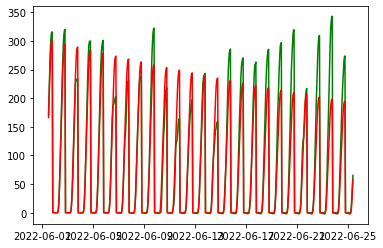

In [56]:
plt.plot(test.index,test.e_day,color='g')
plt.plot(test.index,forecast_df.Prediction,color='r')

In [57]:
model1=model.fit(final_df['e_day'])

In [58]:
forecast1=model1.predict(n_periods=50, return_conf_int=True)
forecast_range=pd.date_range(start='2022-06-25 11:00:00', periods=50,freq='H')

In [59]:
forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range,columns=['Prediction'])

In [60]:
final_df.e_day[-1]

65.17

In [61]:
forecast1_df[0:50]

Prediction
2022-06-25 11:00:00   98.898648
2022-06-25 12:00:00  135.051095
2022-06-25 13:00:00  170.565940
2022-06-25 14:00:00  201.042006
2022-06-25 15:00:00  228.209662
2022-06-25 16:00:00  252.813022
2022-06-25 17:00:00  269.673725
2022-06-25 18:00:00  278.362446
2022-06-25 19:00:00  280.723385
2022-06-25 20:00:00   -1.104117
2022-06-25 21:00:00   -0.745596
2022-06-25 22:00:00   -0.510937
2022-06-25 23:00:00   -0.374392
2022-06-26 00:00:00   -0.300122
2022-06-26 01:00:00   -0.265300
2022-06-26 02:00:00   -0.249023
2022-06-26 03:00:00   -0.246590
2022-06-26 04:00:00   -0.252875
2022-06-26 05:00:00   -0.093394
2022-06-26 06:00:00    1.905159
2022-06-26 07:00:00    9.357501
2022-06-26 08:00:00   27.720920
2022-06-26 09:00:00   49.677739
2022-06-26 10:00:00   74.371153
2022-06-26 11:00:00  106.111374
2022-06-26 12:00:00  141.038964
2022-06-26 13:00:00  174.470181
2022-06-26 14:00:00  202.686857
2022-06-26 15:00:00  228.181479
2022-06-26 16:00:00  251.236842
2022-06-26 17:00:00  266.991161
2022-06-26 18:00:00  274.934247
2022-06-26 19:00:00  276.808319
2022-06-26 20:00:00   -0.496285
2022-06-26 21:00:00   -0.361946
2022-06-26 22:00:00   -0.281569
2022-06-26 23:00:00   -0.251878
2022-06-27 00:00:00   -0.253115
2022-06-27 01:00:00   -0.270278
2022-06-27 02:00:00   -0.289403
2022-06-27 03:00:00   -0.311808
2022-06-27 04:00:00   -0.335852
2022-06-27 05:00:00   -0.190464
2022-06-27 06:00:00    1.767804
2022-06-27 07:00:00    9.090124
2022-06-27 08:00:00   27.246203
2022-06-27 09:00:00   48.826351
2022-06-27 10:00:00   73.096452
2022-06-27 11:00:00  104.292743
2022-06-27 12:00:00  138.621845

In [62]:
son30=final_df['e_day'][-30:]

In [63]:
son30_tarih=final_df.index[-30:]

In [64]:
x_toplam=[]
y_toplam=[]
for i in range(len(son30)):
    x_toplam.append(son30_tarih[i])
    y_toplam.append(son30[i])
for i in range(len(forecast_range)):
    x_toplam.append(forecast_range[i])
    y_toplam.append(forecast1[0][i])

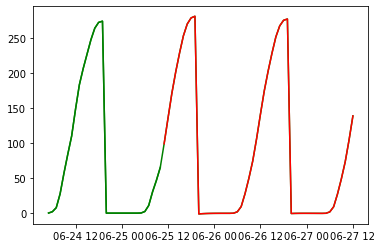

In [65]:
plt.plot(x_toplam,y_toplam,color='g')
plt.plot(son30_tarih,son30,color='g')
plt.plot(forecast_range,(forecast1[0]),color='r')

In [66]:
forecast1=model.predict(n_periods=5000, return_conf_int=True)
forecast_range=pd.date_range(start='2022-06-25 11:00:00', periods=5000,freq='H')

In [67]:
forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range,columns=['Prediction'])

In [68]:
x_toplam=[]
y_toplam=[]
for i in range(len(son30)):
    x_toplam.append(son30_tarih[i])
    y_toplam.append(son30[i])
for i in range(len(forecast_range)):
    x_toplam.append(forecast_range[i])
    y_toplam.append(forecast1[0][i])

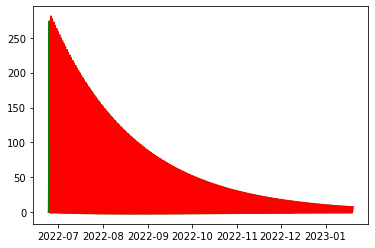

In [69]:
plt.plot(x_toplam,y_toplam,color='g')
plt.plot(son30_tarih,son30,color='g')
plt.plot(forecast_range,(forecast1[0]),color='r')